In [6]:
#########################################

In [2]:
from glob import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
import sklearn.metrics
import pandas as pd
from sklearn.decomposition import PCA
checkpoint_path2 = '/home/gangmin_data/capstone_data/checkpoint2'
checkpoint_path = '/home/gangmin_data/capstone_data/checkpoint'

In [3]:
import tensorflow_addons as tfa

In [3]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/0_train.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/training/0')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/0_test.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/test/0')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/1_train.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/training/1')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/1_test.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/test/1')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/2_train.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/training/2')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/2_test.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/test/2')

                       
fantasy_zip.close()

In [4]:
data_list = glob('/home/gangmin_data/capstone_data2/training/*/*/*.jpg')
data_list2 = glob('/home/gangmin_data/capstone_data2/training/*/*/*.JPG')

In [5]:
data_list = data_list + data_list2

In [6]:
test_data = glob('/home/gangmin_data/capstone_data2/test/*/*/*.jpg')
test_data2 = glob('/home/gangmin_data/capstone_data2/test/*/*/*.JPG')
test_data = test_data + test_data2

In [7]:
data_list = test_data +data_list

In [8]:
data_list, test_data = train_test_split(data_list, test_size = 0.2,)

In [9]:
train_path = data_list

test_path = test_data

In [10]:
def get_label_from_path(path): #label 분리 
    list_label = []
    for i in range(len(path)):
        list_label.append(int(path[i].split('/')[-3]))
    return list_label

In [11]:
IMG_SIZE = 128 # 모든 이미지는 128x128으로 크기가 조정됩니다

def format_example(path):   #전처리
    image = np.array(Image.open(path))
    image = tf.cast(image, tf.float32)
    image = (image/127.5) -1
    if image.ndim != (3 or 4):
        print(path, 'ndim =', image.ndim)
        os.remove(path)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image

In [12]:

label = get_label_from_path(train_path)

test_label = get_label_from_path(test_path)


In [13]:
print(label)
print(len(label))

[1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 

In [14]:
print(test_label)
print(len(test_label))
print(test_label.count(1))
print(test_label.count(2))
print(test_label.count(0))

[2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 

In [15]:
batch_size = 32
data_height = 128
data_width = 128
channel_n = 3

def make_Batch_image(data_list):
    batch_image = np.zeros((len(data_list), data_height, data_width,channel_n))
    for n in range(len(data_list)):
        path = data_list[n]
        image = format_example(path)
        if image.shape != (data_height,data_width, 3):
            os.remove(path)
        else:
            batch_image[n,:,:,:] = image
    return batch_image

In [16]:
train_image = make_Batch_image(train_path)
test_image = make_Batch_image(test_data)


In [17]:
print(train_image.shape)

(2011, 128, 128, 3)


In [18]:
def make_dataset(image, label):
    image = tf.cast(image, dtype = 'float32')
    label = tf.cast(label, dtype = 'uint8')
    ds = tf.data.Dataset.from_tensor_slices( (image, label)).shuffle(1971).batch(32)
    return ds

In [19]:
train_ds = make_dataset(train_image, label)
test_ds = make_dataset(test_image, test_label)


In [20]:
train_ds
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


In [166]:
import random

def augment(image, label):
   # Random crop back to the original size
    a = random.uniform(0.1,0.5)
    b = random.randrange(0, 359)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.adjust_saturation(image, 3)
    image = tf.image.adjust_brightness(image, a)
    image = tfa.image.rotate(image, angles = b, fill_mode = 'reflect') # Random brightnes
    
    return image, label

train_ds = (train_ds.shuffle(1975).map(augment, 
                                       num_parallel_calls = tf.data.experimental.AUTOTUNE).prefetch(tf.data.experimental.AUTOTUNE))

In [249]:
for img, label in train_ds.take(1):
    print(img)
    print(label)

tf.Tensor(
[[[[ 1.21568680e-01 -3.64705861e-01 -5.60784340e-01]
   [ 1.21568680e-01 -3.64705861e-01 -5.60784340e-01]
   [ 1.21568680e-01 -3.64705861e-01 -5.60784340e-01]
   ...
   [ 6.78860307e-01  4.83884841e-01  3.11611563e-01]
   [ 8.16727936e-01  6.40134811e-01  4.72457141e-01]
   [ 9.05882359e-01  7.41176486e-01  5.76470613e-01]]

  [[ 1.29350543e-01 -3.56923997e-01 -5.53002477e-01]
   [ 1.29350543e-01 -3.56923997e-01 -5.53002477e-01]
   [ 1.29350543e-01 -3.56923997e-01 -5.53002477e-01]
   ...
   [ 6.28414989e-01  4.37193662e-01  2.57412106e-01]
   [ 7.68562436e-01  5.93443632e-01  4.22817379e-01]
   [ 8.59191179e-01  6.94485307e-01  5.29779434e-01]]

  [[ 1.39767215e-01 -3.49019587e-01 -5.45098066e-01]
   [ 1.39767215e-01 -3.49019587e-01 -5.45098066e-01]
   [ 1.39767215e-01 -3.49019587e-01 -5.45098066e-01]
   ...
   [ 5.59545338e-01  3.69757473e-01  1.83428884e-01]
   [ 7.01272488e-01  5.27479470e-01  3.51993620e-01]
   [ 7.92922795e-01  6.29473090e-01  4.60998803e-01]]

  ...

 

In [255]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
transfer_model1 = tf.keras.applications.MobileNet(include_top = False, weights = 'imagenet', 
                                                  input_shape =IMG_SHAPE ) 
transfer_model2 = tf.keras.applications.MobileNet(include_top = False, weights = 'imagenet',
                                                  input_shape =IMG_SHAPE )

In [125]:
transfer_model1.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [256]:

modelcheck = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path ,monitor= 'val_loss', s
                                                ave_best_only= True, mode = 'min', save_freq= 'epoch' )
callback = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 3)

def get_ensemble():
    inputs = tf.keras.Input(shape = IMG_SHAPE)
    x = transfer1_model(inputs)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024,)(x)
    outputs = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(x)
    return tf.keras.Model(inputs, outputs)

model1 = get_ensemble()
model2 = get_ensemble()
model3 = get_ensemble()

inputs = tf.keras.Input(shape = IMG_SHAPE)

y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)

outputs = tf.keras.layers.average([y1,y2,y3])

ensemble_model = tf.keras.Model(inputs = inputs,outputs = outputs)

ensemble_model.compile(loss = tfa.losses.LiftedStructLoss(),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0005),)

ensemble_model.fit(
    train_ds,
    validation_data = test_ds,
    callbacks= [callback, modelcheck],
    epochs=100)


Epoch 1/100
63/63 [==============================] - 58s 848ms/step - loss: 7.6012 - val_loss: 5.5026
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint/assets
Epoch 4/100
63/63 [==============================] - 53s 833ms/step - loss: 5.0937 - val_loss: 5.3120
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint/assets
Epoch 5/100
63/63 [==============================] - 52s 831ms/step - loss: 4.4890 - val_loss: 4.7977
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint/assets
Epoch 6/100
63/63 [==============================] - 53s 833ms/step - loss: 4.6996 - val_loss: 5.8399
Epoch 7/100
63/63 [==============================] - 53s 838ms/step - loss: 5.0919 - val_loss: 4.7115
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint/assets
Epoch 8/100
63/63 [==============================] - 53s 835ms/step - loss: 4.5194 - val_loss: 5.1036
Epoch 9/100
63/63 [=========================

In [24]:
ensemble_model = tf.keras.models.load_model(checkpoint_path)
ensemble_model.evaluate(test_ds, batch_size=128, verbose=1)

16/16 [==============================] - 4s 136ms/step - loss: 4.2084


4.208363056182861

In [259]:
ensemble_model.trainble = False

ensemble_model_result = tf.keras.Sequential([
    ensemble_model,
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(3)
])

In [260]:

modelcheck2 = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path2 ,monitor= 'val_loss', 
                                                 save_best_only= True, mode = 'min', save_freq= 'epoch' )

ensemble_model_result.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
             metrics = ['accuracy'])

ensemble_model_result.fit(train_ds, validation_data = test_ds, epochs = 100, 
                          callbacks = [callback, modelcheck2])


Epoch 1/100
63/63 [==============================] - 58s 852ms/step - loss: 0.8989 - accuracy: 0.9106 - val_loss: 0.2091 - val_accuracy: 0.9742
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 2/100
63/63 [==============================] - 53s 837ms/step - loss: 0.1013 - accuracy: 0.9955 - val_loss: 0.1580 - val_accuracy: 0.9543
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 3/100
63/63 [==============================] - 52s 832ms/step - loss: 0.0386 - accuracy: 0.9943 - val_loss: 0.1592 - val_accuracy: 0.9722
Epoch 4/100
63/63 [==============================] - 52s 831ms/step - loss: 0.0571 - accuracy: 0.9887 - val_loss: 0.1515 - val_accuracy: 0.9702
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 5/100
63/63 [==============================] - 53s 833ms/step - loss: 0.0364 - accuracy: 0.9931 - val_loss: 0.1714 - val_accuracy: 0.9702
Epoch 6/100
63/63 [

In [20]:
ensemble_model_result = tf.keras.models.load_model(checkpoint_path2)
ensemble_model_result.evaluate(test_ds)

16/16 [==============================] - 4s 134ms/step - loss: 0.0501 - accuracy: 0.9901


[0.05009429529309273, 0.9900596141815186]

In [5]:
LABELS = ['Warts', 'Corns', 'Noraml Skin']

def confusion_mat(model,test_image,test_label):
    predictions = model.predict(test_image)
    arg = np.argmax(predictions, axis = 1)
    tf.math.confusion_matrix(labels = test_label, predictions = arg)
    sns.heatmap(tf.math.confusion_matrix(labels = test_label, predictions = arg), 
                xticklabels= LABELS, yticklabels= LABELS, cmap = 'Blues', annot = True, fmt = "d" )

    metric = tfa.metrics.F1Score(num_classes = 3, threshold = None, average = 'weighted' )
    category = tf.keras.utils.to_categorical(test_label, num_classes = 3)
    metric.update_state(category, predictions)

    result = metric.result()
    print(result)


In [40]:
def confusion_norm(model,test_image,test_label ):
    predictions = model.predict(test_image)
    arg = np.argmax(predictions, axis = 1)
    normalize= sklearn.metrics.confusion_matrix(test_label, arg, normalize='true')
    sns.heatmap(normalize, cmap = 'Blues', annot = True, fmt = "f")

tf.Tensor(0.9899929, shape=(), dtype=float32)


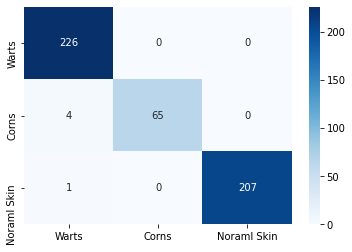

In [24]:
confusion_mat(ensemble_model_result,test_image, test_label)

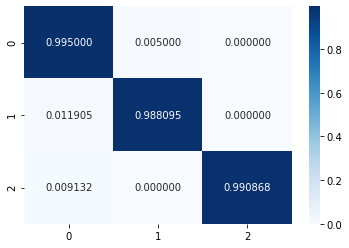

In [47]:
confusion_norm(ensemble_model_result,test_image, test_label)

In [33]:
############## all freeze ,classifier 만 조정

In [25]:
transfer_model2.trainable = False

In [26]:
model = tf.keras.Sequential([
    transfer_model2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(3)
])

In [27]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
             metrics = ['accuracy'])


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 3)
model.fit(train_ds, validation_data= test_ds, epochs = 100, callbacks= [callback])


Epoch 1/100
62/62 [==============================] - 14s 164ms/step - loss: 0.8477 - accuracy: 0.6094 - val_loss: 1.2216 - val_accuracy: 0.5288
Epoch 2/100
62/62 [==============================] - 9s 140ms/step - loss: 0.5277 - accuracy: 0.7803 - val_loss: 0.7581 - val_accuracy: 0.6976
Epoch 3/100
62/62 [==============================] - 9s 136ms/step - loss: 0.3925 - accuracy: 0.8427 - val_loss: 0.5853 - val_accuracy: 0.7718
Epoch 4/100
62/62 [==============================] - 9s 132ms/step - loss: 0.4371 - accuracy: 0.8424 - val_loss: 1.0547 - val_accuracy: 0.6494
Epoch 5/100
62/62 [==============================] - 9s 133ms/step - loss: 0.3358 - accuracy: 0.8758 - val_loss: 1.0820 - val_accuracy: 0.6327
Epoch 6/100
62/62 [==============================] - 9s 131ms/step - loss: 0.3459 - accuracy: 0.8676 - val_loss: 0.7541 - val_accuracy: 0.7199


In [324]:
model.evaluate(test_ds)

17/17 [==============================] - 2s 91ms/step - loss: 1.3527 - accuracy: 0.5937


[1.3527112007141113, 0.5936920046806335]

In [ ]:
#미세조정

In [32]:
transfer_model2.trainable = True

In [33]:
print('number of layers :', len(fine_inception.layers))

number of layers : 311


In [34]:
fine_layer = 70

In [35]:
for layer in transfer_model2.layers[:fine_layer]:
    layer.trainable = False

In [36]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
             metrics = ['accuracy'])

In [37]:
checkpoint_path2 = '/home/gangmin_data/capstone_data/checkpoint2'
modelcheck2 = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path2 ,monitor= 'val_loss', 
                                                 save_best_only= True, mode = 'min', save_freq= 'epoch' )

model.fit(train_ds, validation_data= test_ds, epochs = 100, callbacks= [callback,modelcheck2])


model = tf.keras.models.load_model(checkpoint_path2)

Epoch 1/100
62/62 [==============================] - 29s 382ms/step - loss: 0.6699 - accuracy: 0.7273 - val_loss: 0.5219 - val_accuracy: 0.8720
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 2/100
62/62 [==============================] - 23s 360ms/step - loss: 0.2971 - accuracy: 0.8925 - val_loss: 0.3056 - val_accuracy: 0.9091
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 3/100
62/62 [==============================] - 24s 366ms/step - loss: 0.2307 - accuracy: 0.9094 - val_loss: 0.3066 - val_accuracy: 0.8942
Epoch 4/100
62/62 [==============================] - 24s 375ms/step - loss: 0.2184 - accuracy: 0.9241 - val_loss: 0.2894 - val_accuracy: 0.8998
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 5/100
62/62 [==============================] - 23s 361ms/step - loss: 0.1331 - accuracy: 0.9456 - val_loss: 0.4266 - val_accuracy: 0.8627
Epoch 6/100
62/62 [

In [38]:
model.evaluate(test_ds)

17/17 [==============================] - 3s 103ms/step - loss: 0.2894 - accuracy: 0.8998


[0.2894459366798401, 0.8998144865036011]

In [ ]:
##################### naive 모델

In [323]:
naive = tf.keras.applications.ResNet50(include_top = False, weights = None, input_shape = IMG_SHAPE)

In [324]:
naive.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [325]:
naive_model = tf.keras.Sequential([
    naive,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(3),
])

In [326]:
naive_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
             metrics = ['accuracy'])

naive_model.fit(train_ds, batch_size= 32, validation_data = test_ds, epochs = 100, callbacks = [callback])


Epoch 1/100
62/62 [==============================] - 87s 1s/step - loss: 3.4848 - accuracy: 0.3821 - val_loss: 9319364.0000 - val_accuracy: 0.3544
Epoch 2/100
62/62 [==============================] - 81s 1s/step - loss: 1.0500 - accuracy: 0.4292 - val_loss: 25.8756 - val_accuracy: 0.5584
Epoch 3/100
62/62 [==============================] - 81s 1s/step - loss: 1.0200 - accuracy: 0.4631 - val_loss: 1.1710 - val_accuracy: 0.5733
Epoch 4/100
62/62 [==============================] - 81s 1s/step - loss: 1.0148 - accuracy: 0.4659 - val_loss: 0.9790 - val_accuracy: 0.5325
Epoch 5/100
62/62 [==============================] - 81s 1s/step - loss: 0.9922 - accuracy: 0.5259 - val_loss: 1.0462 - val_accuracy: 0.4434
Epoch 6/100
62/62 [==============================] - 81s 1s/step - loss: 0.9844 - accuracy: 0.5134 - val_loss: 1.0002 - val_accuracy: 0.4879
Epoch 7/100
62/62 [==============================] - 81s 1s/step - loss: 0.9706 - accuracy: 0.5327 - val_loss: 0.9596 - val_accuracy: 0.5788
Epoch 

In [37]:
def pca(model,test_image, test_label):

    pd_list = pd.DataFrame(test_label, columns = ['label'])
    a= model.predict(test_image)

    pca = PCA(n_components = 2)
    component = pca.fit_transform(a)

    principalDf = pd.DataFrame(data = component, 
                           columns = ['principal component 1', 'principal component 2'])
    finalDataFrame = pd.concat([principalDf, pd_list], axis=1)
    y = pd_list.loc[:,['label']].values

    labels = []
    yList = y.tolist()
    for label in yList:
        if label[0] not in labels:
            labels.append(label[0])
    
    

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)

    colors = ["#7fc97f","#beaed4","#fdc086",]
    for label, color in zip(labels, colors):
        indicesToKeep = finalDataFrame['label'] == label
        ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
                   , finalDataFrame.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 30)

    ax.legend(labels)
    ax.grid()

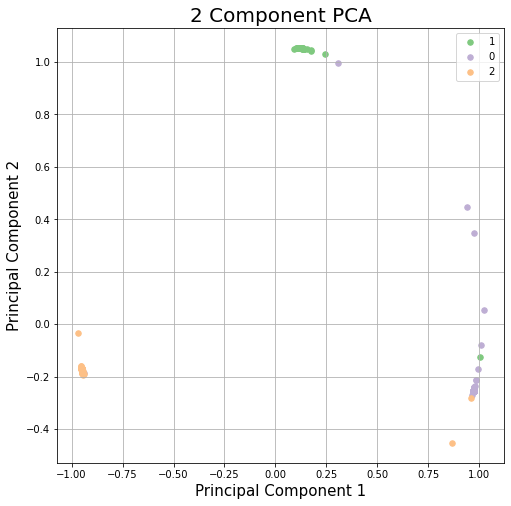

In [38]:
pca(ensemble_model, test_image, test_label)